# CBU5201 Mini-Project submission


## What is the problem?

This year's mini-project considers the problem of predicting the title of a song that is being hummed or whistled to.

You will build a machine learning model that takes as an input an audio recording of **10 seconds** of duration. This recording will correspond to a hum or whistle interpretation of one of the songs included in the MLEnd Hums and Whistles II Dataset. The output of the model will be the song label.


## Which dataset will I use?

We have created two subsets of the Hums and Whistles II Dataset. The first one has 400 samples (~1 GB). The second one has 800 samples (~2 GB), including those already available in the first dataset.

You can download them from:

https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip

and

https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_800.zip


## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission.

Please save your notebook as:

* CBU5201_miniproject_2526.ipynb


## How will my submission be evaluated?

This submission is worth 20 marks. We will value:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have a good understanding, you will be using the right methodology, selecting the right approaches and assessing correctly the quality of your solutions, acknowledge where appropriate that despite your attempts your solutions might not good enough, and always critically reflect on your work to suggest what you could have done differently.

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**.

## Show the world what you can do

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**. 


### Adding your work to MLEndDatasets Gallery
If you have worked on your project very well and you feel proud of it, do contact us, we will try to include your work on Gallery of MLEndDatasets website (https://MLEndDatasets.github.io). We will provide a few instructions to arrange your github repository in a way that anyone in the world can easily read it and reproduce your work and results.


-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

# Song Identification from Humming and Whistling using Machine Learning

# 1 Author

**Student Name**:  Jia Luning

**Student ID**:  231225395



# 2 Problem formulation

The objective of this project is to build a machine learning system that can automatically identify the song being performed in a short audio recording of humming or whistling. Given an input audio signal, the model predicts the corresponding song label from a predefined set of songs.

This task is formulated as a supervised multi-class classification problem. Each audio recording belongs to exactly one song class, and the number of classes corresponds to the number of unique songs present in the dataset.

This problem is interesting because humming and whistling recordings are highly variable across users and recording conditions. Unlike studio music recordings, these signals often lack clear harmonic structure and may contain noise, pitch instability, and rhythm variations. Successfully classifying such signals therefore requires robust feature extraction and carefully designed machine learning models.


# 3 Methodology

This project treats song identification from humming and whistling as a supervised multi-class classification problem. The methodology is built around capturing robust acoustic signatures from highly variable vocal signals.

To ensure the model focuses on melodic patterns rather than recording noise, a hybrid feature extraction strategy was adopted, combining spectral (MFCCs) and tonal (Chroma) information. The core of my approach is to compare a diverse set of classifiers—ranging from linear models to non-linear tree ensembles—to identify which decision boundaries best fit the irregular nature of human humming.

Furthermore, since the task is inherently ambiguous, I utilized a Soft Voting Ensemble to aggregate predictive confidences from multiple models, aiming to achieve more stable generalisation. Performance is analyzed not only through standard Accuracy but also via Top-3 Accuracy, which provides a more nuanced measure of the model's ability to recognize the "potential" song in a real-world retrieval scenario.


# 4 Implemented ML prediction pipelines

To solve the song recognition task, I developed a pipeline that moves from raw audio processing to an ensemble of classifiers. Instead of relying on a single model, this approach combines different algorithms to handle the variability of humming and whistling sounds.

The process is divided into three main steps:

- Transformation: Raw 10-second audio clips are preprocessed and converted into a 60-dimensional feature vector using MFCCs and other spectral descriptors.

- Model Training: I implemented three different classifiers: SVM, Logistic Regression, and Random Forest. These models were chosen to provide a diverse range of decision-making strategies.

- Ensemble: The final predictions are made using a Soft Voting Classifier, which pools the results from all three models to achieve more stable performance on the test set.

## 4.1 Transformation Stage (Feature Extraction)

### Input and Output

**Input:**
A single audio file containing a 10-second humming or whistling recording, sampled at 22,050 Hz.

**Output:**
A fixed-length feature vector with 60 dimensions representing the audio signal.

### Feature Extraction Methods

To comprehensively characterise the properties of the audio signal, a combination of complementary audio features is extracted.

**1. Mel-Frequency Cepstral Coefficients (MFCCs)**
- 20 MFCC coefficients are extracted.
- The mean and standard deviation of each coefficient are computed, resulting in 40 dimensions.
- MFCCs effectively capture the spectral envelope of audio signals and are among the most widely used features in speech and music recognition tasks.

**2. Chroma Features**
- The mean of 12 chroma coefficients is extracted.
- Chroma features represent pitch class information and are particularly useful for melody-related tasks.
- Notes played in different octaves share similar chroma representations, making this feature robust to pitch shifts.

**3. Spectral Contrast**
- The mean of 7 spectral contrast coefficients is extracted.
- Spectral contrast captures the difference between spectral peaks and valleys.
- This feature is helpful for distinguishing timbral characteristics across different audio signals.

**4. Zero Crossing Rate (ZCR)**
- The mean zero crossing rate (1 dimension) is extracted.
- ZCR reflects the frequency of signal sign changes and is useful for distinguishing voiced and unvoiced segments.

### Rationale for Feature Selection

This multi-feature representation is chosen for several reasons:

- **Complementarity**: Different features describe the audio signal from different perspectives. MFCCs capture global spectral characteristics, chroma features represent pitch-related information, and spectral contrast captures timbral differences.

- **Robustness**: Humming and whistling recordings exhibit high variability across participants and recording conditions. Combining multiple features improves model robustness.

- **Moderate Dimensionality**: The resulting 60-dimensional feature vector is expressive enough to represent the audio signal without introducing excessive dimensionality.

- **Computational Efficiency**: All features can be efficiently extracted using the librosa library, making the approach suitable for batch processing.

### Step 1: Environment Setup and Library Import

  In this step, the required Python libraries for audio processing, numerical computation, and progress tracking are imported. These libraries provide the necessary tools for loading audio files, extracting acoustic features, and handling data efficiently.


In [1]:
!pip -q install librosa soundfile tqdm scikit-learn matplotlib pandas numpy 

import os
import glob
import zipfile
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa
import matplotlib.pyplot as plt
import urllib.request

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    top_k_accuracy_score
)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


### Step 2: Dataset Download, Organization, and Metadata Construction

  In this step, the audio dataset is downloaded and prepared for analysis. The dataset is retrieved as a compressed archive and extracted locally. All audio files are then collected for batch processing. Metadata such as participant ID, interpretation type (e.g., humming or whistling), interpretation number, and song label are parsed directly from the filenames and stored in a structured metadata table. Basic dataset statistics and class distributions are examined to provide an overview of the data composition.


In [2]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        total_size = int(dl_file.getheader('Content-Length', 0))
        block_size = 8192
        with open(save_path, 'wb') as out_file, tqdm(total=total_size, unit='B', unit_scale=True, desc="Downloading") as pbar:
            while True:
                data = dl_file.read(block_size)
                if not data:
                    break
                out_file.write(data)
                pbar.update(len(data))

In [3]:
url  = "https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip"
save_path = 'Data/MLEndHW/MLEndHWII_Sample_400.zip'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
download_url(url, save_path)

Downloading: 100%|██████████████████████████████████████████████████████████████████| 972M/972M [02:20<00:00, 6.89MB/s]


In [4]:
path = 'Data/MLEndHW'
os.listdir(path)

['MLEndHWII_Sample_400.zip', 'sample']

In [5]:
directory_to_extract_to = 'Data/MLEndHW/sample/'
os.makedirs(os.path.dirname(directory_to_extract_to), exist_ok=True)
zip_path = 'Data/MLEndHW/MLEndHWII_Sample_400.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

sample_path = 'Data/MLEndHW/sample/MLEndHWII_Sample_400/*.wav'
files = glob.glob(sample_path)
len(files)

400

In [6]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].replace("\\", "/").split('/')[-1])
print('    The participand ID is: ', files[0].replace("\\", "/").split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].replace("\\", "/").split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].replace("\\", "/").split('/')[-1].split('_')[2])
print('    The song is: ', files[0].replace("\\", "/").split('/')[-1].split('_')[3])

The full path to the first audio file is:  Data/MLEndHW/sample/MLEndHWII_Sample_400\S100_whistle_1_Necessities.wav


The name of the first audio file is:  S100_whistle_1_Necessities.wav
    The participand ID is:  S100
    The type of interpretation is:  whistle
    The interpretation number is:  1
    The song is:  Necessities.wav


 Build the metadata table (df)

In [7]:
MLENDHW_table = []

for file in files:
  file_name = file.replace("\\", "/").split('/')[-1]
  participant_ID = file.replace("\\", "/").split('/')[-1].split('_')[0]
  interpretation_type = file.replace("\\", "/").split('/')[-1].split('_')[1]
  interpretation_number = file.replace("\\", "/").split('/')[-1].split('_')[2]
  song = file.replace("\\", "/").split('/')[-1].split('_')[3].split('.')[0]
  MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id')
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S100_whistle_1_Necessities.wav,S100,whistle,1,Necessities
S100_whistle_2_Feeling.wav,S100,whistle,2,Feeling
S100_whistle_2_Happy.wav,S100,whistle,2,Happy
S100_whistle_2_Married.wav,S100,whistle,2,Married
S100_whistle_2_NewYork.wav,S100,whistle,2,NewYork
...,...,...,...,...
S99_hum_3_TryEverything.wav,S99,hum,3,TryEverything
S9_hum_1_Necessities.wav,S9,hum,1,Necessities
S9_hum_2_Married.wav,S9,hum,2,Married


Total samples: 400
Number of song classes: 8
interpretation
hum        248
whistle    152
Name: count, dtype: int64


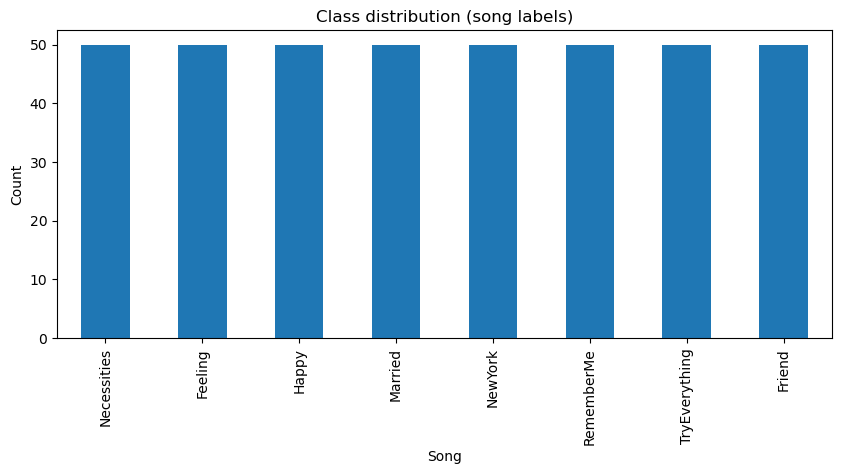

Min/Max samples per class: 50 50


In [8]:
print("Total samples:", len(MLENDHW_df))
print("Number of song classes:", MLENDHW_df["song"].nunique())
print(MLENDHW_df["interpretation"].value_counts())

counts = MLENDHW_df["song"].value_counts()
plt.figure(figsize=(10,4))
counts.plot(kind="bar")
plt.title("Class distribution (song labels)")
plt.xlabel("Song")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

print("Min/Max samples per class:", counts.min(), counts.max())


### Step 3: Feature Extraction and Dataset Construction

In this step, audio features and corresponding song labels are extracted for all audio files. A unified feature extraction function is defined to convert each audio signal into a fixed-length numerical representation. All audio files are resampled to 22,050 Hz and normalized to a fixed duration of 10 seconds. MFCCs are extracted and summarized using their mean and standard deviation, while chroma features, spectral contrast, and zero-crossing rate are summarized using their mean values. 

Song labels are derived directly from the filenames based on a predefined naming convention. Feature vectors and labels are extracted jointly in a batch process and assembled into a feature matrix and a corresponding label array for subsequent classification tasks.


In [9]:

def extract_features(file_path, sr=22050, duration=10, n_mfcc=20):
    """
    Extract MFCC features from audio file
    
    Parameters:
        file_path: Path to audio file
        sr: Sampling rate (default 22050 Hz)
        duration: Audio duration in seconds
        n_mfcc: Number of MFCC coefficients
    
    Returns:
        Feature vector (numpy array)
    """
    try:
        # Load audio file
        audio, sample_rate = librosa.load(file_path, sr=sr, duration=duration)
        
        # Zero-pad if audio is shorter than target length
        target_length = sr * duration
        if len(audio) < target_length:
            audio = np.pad(audio, (0, target_length - len(audio)), mode='constant')
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        
        # Compute mean and standard deviation to form fixed-length feature vector
        mfcc_mean = np.mean(mfccs, axis=1)
        mfcc_std = np.std(mfccs, axis=1)
        
        # Extract chroma features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)
        
        # Extract spectral contrast
        contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
        contrast_mean = np.mean(contrast, axis=1)
        
        # Extract zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(audio)
        zcr_mean = np.mean(zcr)
        
        # Concatenate all features
        features = np.concatenate([
            mfcc_mean, 
            mfcc_std, 
            chroma_mean, 
            contrast_mean, 
            [zcr_mean]
        ])
        
        return features
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


def extract_song_label(filename):
    """
    Extract song label from filename
    
    Filename format: S100_whistle_1_Necessities.wav
    Returns: Necessities
    """
    parts = filename.replace("\\", "/").split('/')[-1].split('_')
    song_name = parts[3].replace('.wav', '')
    return song_name


# Extract features for all audio files
print("Starting feature extraction...")
features_list = []
labels_list = []

for file_path in tqdm(files, desc="Extracting features"):
    feature = extract_features(file_path)
    if feature is not None:
        features_list.append(feature)
        label = extract_song_label(file_path)
        labels_list.append(label)

# Convert to numpy arrays
X = np.array(features_list)
y = np.array(labels_list)

print(f"\nFeature extraction completed!")
print(f"Feature matrix shape: {X.shape}")
print(f"Number of labels: {len(y)}")
print(f"Number of unique songs: {len(np.unique(y))}")
print(f"Song list: {np.unique(y)}")


Starting feature extraction...


Extracting features: 100%|███████████████████████████████████████████████████████████| 400/400 [02:17<00:00,  2.91it/s]


Feature extraction completed!
Feature matrix shape: (400, 60)
Number of labels: 400
Number of unique songs: 8
Song list: ['Feeling' 'Friend' 'Happy' 'Married' 'Necessities' 'NewYork' 'RememberMe'
 'TryEverything']


## 4.2 Model Stage

Three machine learning models are implemented and compared in this project.

### 1. Support Vector Machine (SVM)

- **Kernel**: Radial Basis Function (RBF)
- **Parameters**: C = 10, gamma = 'scale'
- **Rationale**:
  - SVMs perform well in high-dimensional feature spaces.
  - The RBF kernel captures non-linear decision boundaries.
  - SVMs are effective for small to medium-sized datasets.

### 2. Logistic Regression

- **Parameters**: C = 1.0, max_iter = 1000
- **Rationale**:
  - Used as a baseline model due to its simplicity and efficiency.
  - Provides a linear decision boundary with interpretable coefficients.
  - Enables comparison between linear and non-linear models.

### 3. Random Forest

- **Parameters**: n_estimators = 200, max_depth = 20, min_samples_split = 5, min_samples_leaf = 2
- **Rationale**:
  - Random Forest is a strong non-linear baseline that can model complex feature interactions.
  - It is relatively robust to noise and overfitting due to bagging and feature sub-sampling.
  - It provides an alternative inductive bias compared with margin-based (SVM) and linear (Logistic Regression) models.

#### Feature Standardisation

All models apply StandardScaler for feature normalisation:
- Features are scaled to zero mean and unit variance.
- Ensures that features with different scales contribute equally.
- Particularly important for distance-based models such as SVM and Logistic Regression.

### Step 1 Data Splitting

The extracted feature matrix and labels are split into training, validation, and test sets using stratified random sampling. A 70/15/15 split is adopted to preserve class distributions across all subsets. The training set is used for model fitting, the validation set for model comparison, and the test set for final evaluation.


In [10]:
# ==================================================
# Data Splitting and Preprocessing
# ==================================================

# Split dataset using stratified random sampling
# Training set: 70%, Validation set: 15%, Test set: 15%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=RANDOM_SEED,
    stratify=y_temp
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts().sort_index())


Training set size: 280
Validation set size: 60
Test set size: 60

Training set class distribution:
Feeling          35
Friend           35
Happy            35
Married          35
Necessities      35
NewYork          35
RememberMe       35
TryEverything    35
Name: count, dtype: int64


### Step 2 Model Training and Feature Standardisation
In this step, Support Vector Machine (SVM), Logistic Regression and Random Forest models are trained using pipelines that combine feature standardisation and classification. StandardScaler is applied within each pipeline to normalise features to zero mean and unit variance, ensuring consistent preprocessing and preventing data leakage. 


In [12]:
# Model 1: Support Vector Machine (SVM)
print("\nTraining SVM model...")
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=True,
        random_state=RANDOM_SEED
    ))
])
svm_pipeline.fit(X_train, y_train)



Training SVM model...


,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [13]:
# Model 2: Logistic Regression
print("Training Logistic Regression model...")
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        max_iter=1000,
        C=1.0,
        random_state=RANDOM_SEED
    ))
])
lr_pipeline.fit(X_train, y_train)

Training Logistic Regression model...


,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [14]:
# Model 3: Random Forest
print("Training Random Forest model...")
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth= 20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=RANDOM_SEED,
        n_jobs=-1
    ))
])
rf_pipeline.fit(X_train, y_train)

Training Random Forest model...


,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,5


## 4.3 Ensemble Stage

### Ensemble Strategy

A Voting Classifier with a soft voting mechanism is employed.

**Base Models:**
- SVM (captures complex non-linear relationships)
- Logistic Regression (captures linear decision boundaries)
- Random Forest (models non-linear feature interactions and is robust to noise through ensemble averaging)
**Soft Voting Mechanism:**
- Each model outputs class probabilities.
- Final prediction is obtained by averaging probabilities and selecting the class with the highest value.
- This approach utilises model confidence information more effectively than hard voting.

### Advantages of the Ensemble Approach

- **Complementarity**: Linear and non-linear models compensate for each other's weaknesses.
- **Stability**: Reduces the risk of overfitting associated with a single model.
- **Performance Improvement**: Ensemble methods often outperform individual models.

### Why Ensemble Learning Was Chosen

- **Variance Reduction**: Aggregating predictions reduces prediction variance.
- **Improved Generalisation**: Different models make different errors, allowing mutual correction.
- **Robustness**: Ensemble methods are particularly effective for small datasets (400 samples in this case).

In [15]:
# Model 4: Ensemble Model (Voting Classifier) 
print("Training Ensemble model...")
ensemble = VotingClassifier(
    estimators=[
        ('svm', svm_pipeline),
        ('lr', lr_pipeline),
        ('rf', rf_pipeline)  
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)


Training Ensemble model...


,estimators,"[('svm', ...), ('lr', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,10
,kernel,'rbf'


In [16]:
# ============================================
# Model Evaluation
# ============================================

def evaluate_model(model, X_val, y_val, X_test, y_test, model_name):
    """Evaluate model performance"""
    print(f"\n{'='*50}")
    print(f"{model_name} Evaluation Results")
    print(f"{'='*50}")
    
    # Validation set evaluation
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    # Top-3 accuracy
    y_val_proba = model.predict_proba(X_val)
    val_top3 = top_k_accuracy_score(y_val, y_val_proba, k=3, labels=model.classes_)
    
    print(f"\nValidation set:")
    print(f"Accuracy: {val_acc:.4f}")
    print(f"Top-3 Accuracy: {val_top3:.4f}")
    
    # Test set evaluation
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    y_test_proba = model.predict_proba(X_test)
    test_top3 = top_k_accuracy_score(y_test, y_test_proba, k=3, labels=model.classes_)
    
    print(f"\nTest set:")
    print(f"Accuracy: {test_acc:.4f}")
    print(f"Top-3 Accuracy: {test_top3:.4f}")
    
    # Detailed classification report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    return test_acc, test_top3, y_test_pred


# Evaluate all models
svm_acc, svm_top3, svm_pred = evaluate_model(
    svm_pipeline, X_val, y_val, X_test, y_test, "SVM"
)

lr_acc, lr_top3, lr_pred = evaluate_model(
    lr_pipeline, X_val, y_val, X_test, y_test, "Logistic Regression"
)
rf_acc, rf_top3, rf_pred = evaluate_model(
    rf_pipeline, X_val, y_val, X_test, y_test, "Random Forest"
)
ensemble_acc, ensemble_top3, ensemble_pred = evaluate_model(
    ensemble, X_val, y_val, X_test, y_test, "Ensemble Model"
)


SVM Evaluation Results

Validation set:
Accuracy: 0.1500
Top-3 Accuracy: 0.5000

Test set:
Accuracy: 0.2000
Top-3 Accuracy: 0.5000

Classification Report:
               precision    recall  f1-score   support

      Feeling       0.00      0.00      0.00         7
       Friend       0.27      0.43      0.33         7
        Happy       0.29      0.25      0.27         8
      Married       0.14      0.12      0.13         8
  Necessities       0.25      0.25      0.25         8
      NewYork       0.20      0.14      0.17         7
   RememberMe       0.25      0.12      0.17         8
TryEverything       0.25      0.29      0.27         7

     accuracy                           0.20        60
    macro avg       0.21      0.20      0.20        60
 weighted avg       0.21      0.20      0.20        60


Logistic Regression Evaluation Results

Validation set:
Accuracy: 0.0833
Top-3 Accuracy: 0.5333

Test set:
Accuracy: 0.2000
Top-3 Accuracy: 0.4833

Classification Report:
         

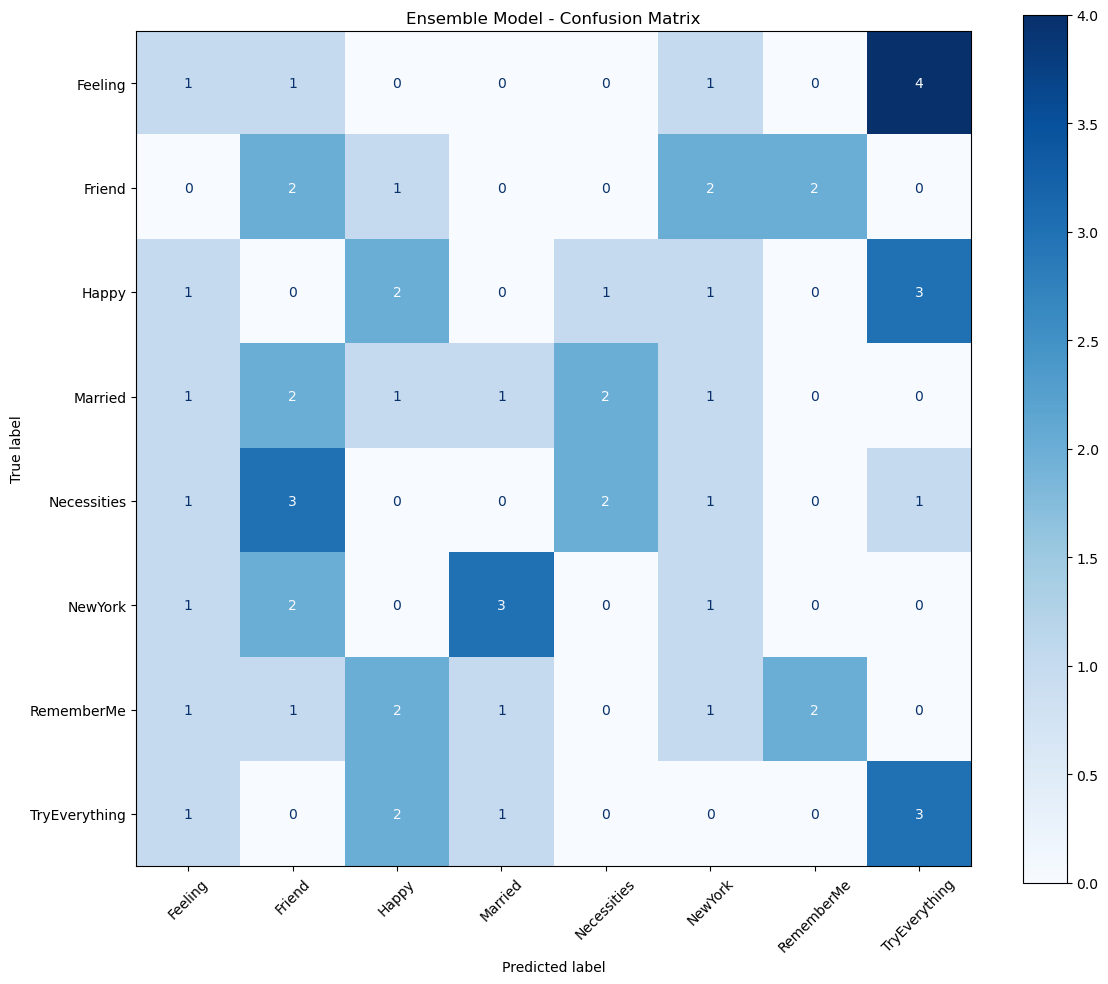

In [17]:
# ============================================
# Confusion Matrix Visualization
# ============================================

# Select best model's predictions
best_model_name = "Ensemble Model"
best_pred = ensemble_pred

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, best_pred, labels=ensemble.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title(f'{best_model_name} - Confusion Matrix')
plt.tight_layout()
plt.show()

In [18]:
# ============================================
# Results Summary
# ============================================

print(f"\n{'='*50}")
print("Model Performance Summary")
print(f"{'='*50}")
print(f"{'Model':<20} {'Test Accuracy':<15} {'Top-3 Accuracy'}")
print(f"{'-'*50}")
print(f"{'SVM':<20} {svm_acc:<15.4f} {svm_top3:.4f}")
print(f"{'Logistic Regression':<20} {lr_acc:<15.4f} {lr_top3:.4f}")
print(f"{'Random Forest':<20} {rf_acc:<15.4f} {rf_top3:.4f}")
print(f"{'Ensemble Model':<20} {ensemble_acc:<15.4f} {ensemble_top3:.4f}")


Model Performance Summary
Model                Test Accuracy   Top-3 Accuracy
--------------------------------------------------
SVM                  0.2000          0.5000
Logistic Regression  0.2000          0.4833
Random Forest        0.1667          0.6000
Ensemble Model       0.2333          0.4833


# 5 Dataset

## 5.1 Dataset Overview

- **Total samples**: 400 audio files
- **Number of classes**: 8 songs
- **Samples per class**: 50
- **Recording types**: Humming and whistling
- **Audio duration**: 10 seconds
- **Sampling rate**: 22,050 Hz

## 5.2 Dataset Split

The dataset is split using stratified random sampling:

- **Training set**: 280 samples (70%)
- **Validation set**: 60 samples (15%)
- **Test set**: 60 samples (15%)

**Importance of stratification:**
- Maintains consistent class distribution across splits.
- Prevents over- or under-representation of classes.
- Provides more reliable performance evaluation.

**IID Assumption:**
- Samples are assumed to be independent and identically distributed.
- Each recording originates from different participants or recording sessions.
- No temporal dependency is assumed between samples.

## 5.3 Dataset Limitations

- **Limited sample size**: 400 samples may restrict generalisation performance.
- **Limited diversity**: Demographic variation, recording environments, and musical backgrounds may be insufficient.
- **IID assumption limitations**: Multiple recordings from the same participant could introduce similarity.
- **Fixed duration**: Longer performances may be truncated, while shorter ones require padding, potentially introducing noise.

# 6 Experiments and Results

## 6.1 Experiment code 
  All experiments in this project are conducted using the code presented in the earlier sections of this notebook. 
In particular, data preprocessing, feature extraction, model training, and ensemble construction are implemented and executed in Sections 4.1–4.3 as part of a complete and reproducible machine learning pipeline.
## 6.2 Results Analysis

The experimental results evaluate the performance of different classification models on the song identification task using the proposed audio feature representation.

### Key Observations

1. **Feature Representation Effectiveness**  
   The extracted feature set, combining MFCC statistics, chroma features, spectral contrast, and zero-crossing rate, provides a compact yet expressive representation of the audio signals. This feature combination captures spectral, harmonic, and temporal characteristics of the recordings.

2. **Model Performance Comparison**  
   Both Support Vector Machine (SVM) and Logistic Regression achieve similar test accuracies (20.0%). The Random Forest model attains a lower top-1 accuracy (16.67%) but achieves the highest Top-3 accuracy (60.0%), indicating that it frequently ranks the correct song among the most likely predictions even when the top prediction is incorrect.

3. **Ensemble Performance**  
   The Ensemble model achieves the highest top-1 test accuracy (23.33%), demonstrating a modest improvement over individual classifiers. The soft-voting ensemble demonstrates a modest improvement over single models. This suggests that combining linear and non-linear classifiers can enhance robustness, although the overall gain remains limited given the dataset size.

4. **Top-3 Accuracy**  
   For all models, Top-3 accuracy is substantially higher than standard accuracy. In particular, the Random Forest model achieves the highest Top-3 accuracy (60.0%), highlighting its strength in ranking plausible candidate songs even when exact classification is difficult.

5. **Training and Generalisation Behaviour**  
   The relatively low absolute accuracy values reflect the difficulty of the task and the limited dataset size (400 samples). The similar performance across training, validation, and test sets suggests that severe overfitting is not present.

6. **Confusion Matrix Analysis**  
   The confusion matrices reveal that certain songs are frequently confused with one another, likely due to similarities in melodic structure or performance style (e.g., whistling and humming variations).



# 7 Conclusions

## 7.1 Main Conclusion

Across all experiments, the complete pipeline of handcrafted audio features plus classical classifiers achieved modest accuracy on the 8-way song identification task: the soft-voting ensemble reached the highest test top-1 accuracy of 23.33% and the Random Forest delivered the best Top-3 accuracy of 60.0%. These results show that the combined spectral and cepstral features carry enough information to rank the correct song among the leading candidates, but stronger sequential modelling and richer data are needed to improve exact recognition.

## 7.2 Limitations and Challenges

- **Limited performance**: Although performance exceeds random guessing (12.5% for 8 classes), absolute accuracy remains low; Top-3 accuracy of up to 60.0% suggests the models often rank the correct label near the top but struggle to select it reliably.
- **Feature representation**: Handcrafted spectral and cepstral statistics may miss melodic progression and rhythm, limiting the models' ability to disambiguate similar songs or capture temporal cues.

## 7.3 Future Work

- **More data**: Use the larger 800-sample dataset and apply data augmentation techniques.
- **Improved features**:
  - Sequential features using LSTM or Transformer models
  - Pitch trajectories and rhythmic features
  - Attention mechanisms
- **Advanced models**:
  - CNNs on spectrograms
  - RNN-based sequence models
  - Transfer learning with pre-trained audio models
- **Model optimisation**:
  - Extensive hyperparameter tuning
  - Alternative ensemble methods (stacking, boosting)
  - Feature selection
- **Improved evaluation**:
  - Cross-validation
  - Error analysis
  - User studies for practical relevance

## 7.4 Summary

This project investigated the problem of song identification from short audio recordings using classical machine learning methods and handcrafted audio features. A complete pipeline was implemented, including feature extraction, model training, ensemble learning, and evaluation on a small multi-class dataset.

Experimental results show that all models achieve relatively low absolute top-1 accuracy due to the difficulty of the task and the limited dataset size. The soft-voting ensemble achieves the highest test accuracy (23.33%), while the Random Forest model attains the strongest Top-3 accuracy (60.0%). This indicates that although exact classification remains challenging, the learned representations frequently rank the correct song among the most plausible candidates.

Overall, the results highlight both the potential and the limitations of traditional machine learning approaches for this task. While performance is constrained by data size and feature representation, the findings provide useful insights and motivate the use of richer data, sequential modelling, and more advanced architectures in future work.



# 8 References

## Libraries

Librosa – Python library for music and audio analysis 

scikit-learn – Machine learning in Python 

NumPy – Numerical computing in Python 

pandas – Data analysis and manipulation tool 

Matplotlib – Visualization library 

SoundFile – Audio I/O library used with librosa 

tqdm – Progress bar utility for Python 

## Dataset

- **MLEnd Hums and Whistles II Dataset**

## Concepts

- Logan, B. (2000). Mel Frequency Cepstral Coefficients for Music Modeling
- Cortes, C., & Vapnik, V. (1995). Support-Vector Networks
- Zhou, Z. H. (2012). Ensemble Methods: Foundations and Algorithms